# Tugas 1 (Tambahan)

4. Dengan menggunakan dataset dibawah ini, https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction
(https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction)
5. Jelaskan apa tujuan penggunaan dataset ini?
6. Definisikan atribut yang menjadi input dan output nya?
7. Silahkan membuat model klasifikasi logistic reg, knn, DT, dan RF untuk kasus dataset diatas!
8. Buatlah tabel yang menjelaskan performa dari model machine learning untuk kasus dataset diatas! Kolom pertama "model",
kolom selanjutnya "accuracy, precision, recall".
9. Jelaskan dari hasil experimen diatas, model mana yang paling baik? Jelaskan alasan anda!

4. sudah saya download dataset nya.
5. Tujuan penggunaan dataset ini adalah untuk memprediksi status pinjaman, apakah akan di approve atau tidak.

In [1]:
import pandas as pd

df = pd.read_csv('loan_data.csv')

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


attribute input:
- Gender : jenis kelamin peminjam
- Married : status pernikahan peminjam
- Dependents : jumlah tanggungan peminjam
- Education : tingkat pendidikan peminjam
- Self_Employed : status pekerjaan peminjam misalnya wiraswasta atau tidak
- ApplicantIncome : pendapatan peminjam
- CoapplicantIncome : pendapatan co-peminjam misalnya pasangan
- LoanAmount : jumlah pinjaman
- Loan_Amount_Term : jangka waktu pinjaman dalam bulan
- Credit_History : riwayat kredit peminjam 
- Property_Area : lokasi properti peminjam

attribute output:
- Loan_Status : status pinjaman, Y = approved, N = not approved

In [2]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


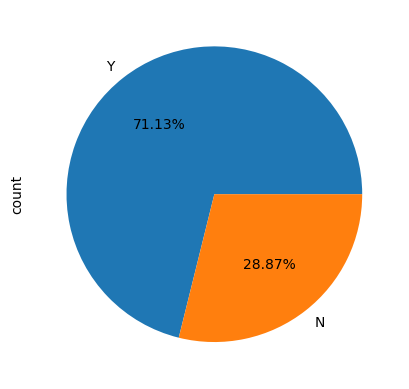

In [5]:
import matplotlib.pyplot as plt

data = df['Loan_Status'].value_counts()
data.plot(kind='pie', autopct='%.2f%%')
plt.show()

dari diagram diatas dapa dilihat bahwa dataset tidak seimbang antara yang load approved dan tidak approved, terlihat dari jumlah data yang lebih banyak pada loan approved dengan status Y.

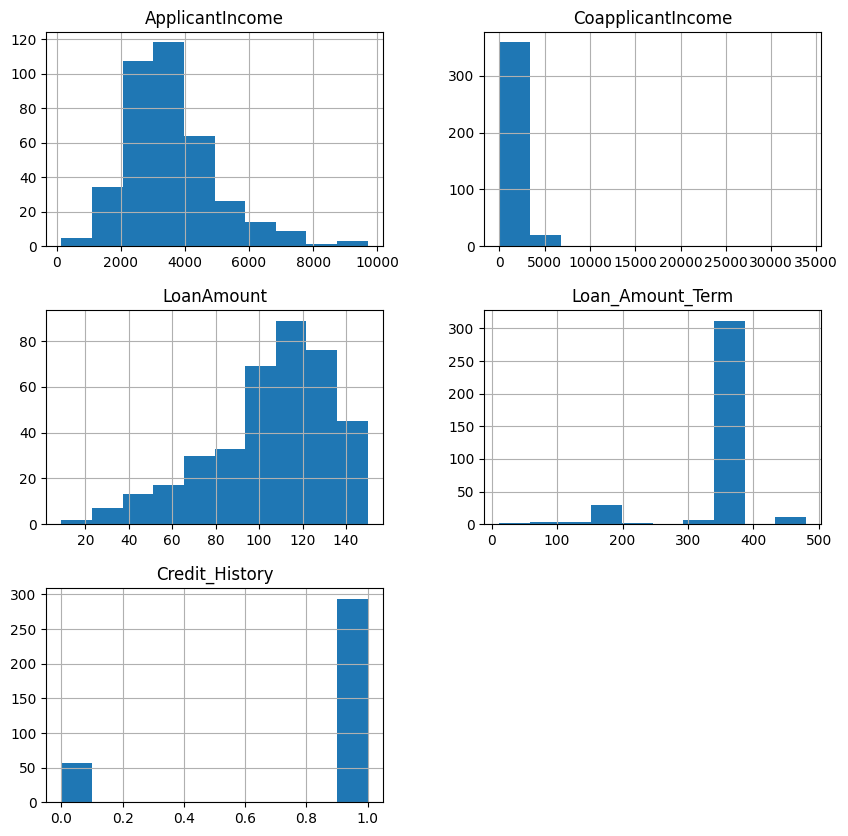

In [6]:
df.hist(figsize=(10, 10))
plt.show()

In [7]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# inputation untuk handling missing value
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0]) # mengisi missing value dengan modus
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode().iloc[0]) # mengisi missing value dengan modus
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0]) # mengisi missing value dengan modus
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0]).astype(int) # mengisi missing value dengan modus
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0]).astype(int) # mengisi missing value dengan modus

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# df = df.drop(['Loan_ID'], axis=1)

In [11]:
# # convert data kategorikal menjadi numerik
# def c_to_n(df, c):
#     for i in c:
#         unique_value = df[i].unique()
#         df[i].replace(unique_value, [0, 1], inplace=True)
#     for i in ['Property_Area']:
#         unique_value = df[i].unique()
#         df[i].replace(unique_value, [0, 1, 2], inplace=True)
# c = ['Gender', 'Married', 'Education', 'Education','Self_Employed', 'Loan_Status']
# c_to_n(df, c)        
        

In [12]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360,1,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360,1,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360,1,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360,1,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180,1,Rural,Y


In [13]:
# data preprocessing
df_X = df.drop(['Loan_ID','Loan_Status'], axis=1)
df_y = df[['Loan_Status']]

cats = df_X.select_dtypes(include=['object', 'bool']).columns
print(cats)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


In [14]:
df_X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1,Rural
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1,Urban
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1,Urban
3,Male,No,0,Graduate,No,6000,0.0,141.0,360,1,Urban
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360,1,Urban
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360,1,Rural
378,Female,No,0,Graduate,No,2900,0.0,71.0,360,1,Rural
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180,1,Rural


In [15]:
# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.metrics import sensitivity_specificity_support

label_encoder = LabelEncoder()
df_y = label_encoder.fit_transform(df_y) # mengubah data kategorikal menjadi numerik

cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
for cat in cat_features:
    df_X[cat] = label_encoder.fit_transform(df_X[cat])

# menyiman data X dan y ke dalam ndarray
X = df_X.astype(float).values
y = df_y.astype(float)

# split data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
X

array([[  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   2.],
       [  1.,   1.,   0., ..., 360.,   1.,   2.],
       ...,
       [  0.,   0.,   0., ..., 360.,   1.,   0.],
       [  1.,   1.,   3., ..., 180.,   1.,   0.],
       [  0.,   0.,   0., ..., 360.,   0.,   1.]])

In [17]:
y

array([0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0.

In [18]:
X_train

array([[ 0.52805885,  0.78238176,  1.34839181, ...,  0.29817126,
        -2.30940108, -1.34983269],
       [ 0.52805885, -1.27814841, -0.68951854, ..., -0.58309046,
         0.4330127 , -1.34983269],
       [ 0.52805885,  0.78238176, -0.68951854, ..., -0.58309046,
         0.4330127 ,  1.23330037],
       ...,
       [ 0.52805885,  0.78238176, -0.68951854, ...,  0.29817126,
         0.4330127 , -1.34983269],
       [ 0.52805885,  0.78238176, -0.68951854, ...,  0.29817126,
         0.4330127 , -1.34983269],
       [ 0.52805885, -1.27814841, -0.68951854, ...,  2.0606947 ,
        -2.30940108, -0.05826616]])

In [19]:
X_test

array([[ 0.52805885,  0.78238176, -0.68951854, ...,  0.29817126,
         0.4330127 , -1.34983269],
       [ 0.52805885,  0.78238176,  0.32943664, ...,  0.29817126,
         0.4330127 ,  1.23330037],
       [ 0.52805885,  0.78238176,  2.36734699, ...,  0.29817126,
         0.4330127 ,  1.23330037],
       ...,
       [ 0.52805885,  0.78238176, -0.68951854, ...,  0.29817126,
        -2.30940108,  1.23330037],
       [ 0.52805885, -1.27814841, -0.68951854, ...,  0.29817126,
         0.4330127 , -0.05826616],
       [ 0.52805885, -1.27814841,  0.32943664, ...,  0.29817126,
         0.4330127 , -0.05826616]])

Accuracy: 0.808695652173913
Precision: 0.79
Recall: 0.9875
F1 Score: 0.8777777777777778
Confusion Matrix: [[14 21]
 [ 1 79]]
Sensitivity dan Specificity: (0.9875, 0.4, None)


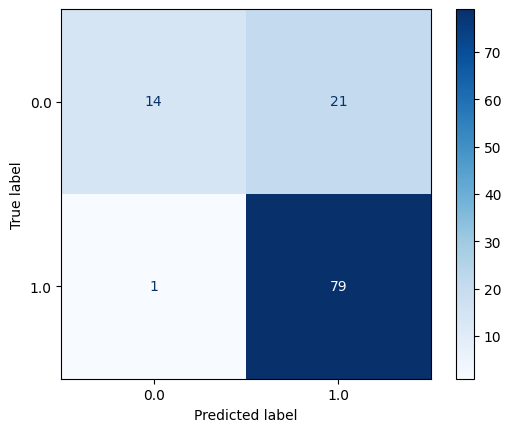

In [20]:
# logistic regression
import numpy as np
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(X_train, y_train)
# membuat prediksi
y_pred = model.predict(X_test)
# menghitung akurasi model dengan accuracy, precision, recall, dan confusion matrix
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Sensitivity dan Specificity:', sensitivity_specificity_support(y_test, y_pred, average='binary'))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

In [21]:
model.coef_

array([[ 0.07054615, -0.09752875,  0.03615566, -0.12956347, -0.00499456,
        -0.20308211,  0.23508759,  0.24048448, -0.43665194,  1.68638587,
        -0.00931606]])

In [22]:
model.intercept_

array([1.01814898])

Accuracy: 0.7478260869565218
Precision: 0.7931034482758621
Recall: 0.8625
F1 Score: 0.8263473053892215
Confusion Matrix: [[17 18]
 [11 69]]
Sensitivity dan Specificity: (0.8625, 0.4857142857142857, None)


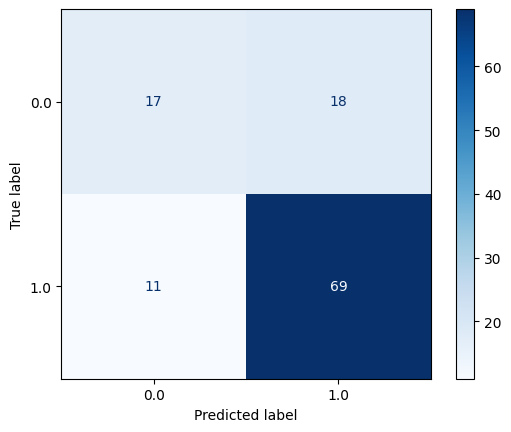

In [23]:
# decision tree

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# membuat prediksi
y_pred = model.predict(X_test)
# menghitung akurasi model dengan accuracy, precision, recall, dan confusion matrix
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Sensitivity dan Specificity:', sensitivity_specificity_support(y_test, y_pred, average='binary'))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

Accuracy: 0.8173913043478261
Precision: 0.8041237113402062
Recall: 0.975
F1 Score: 0.8813559322033898
Confusion Matrix: [[16 19]
 [ 2 78]]
Sensitivity dan Specificity: (0.975, 0.45714285714285713, None)


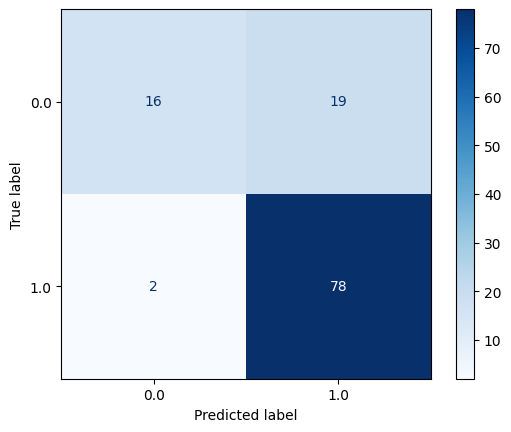

In [24]:
# random forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
# membuat prediksi
y_pred = model.predict(X_test)
# menghitung akurasi model dengan accuracy, precision, recall, dan confusion matrix
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Sensitivity dan Specificity:', sensitivity_specificity_support(y_test, y_pred, average='binary'))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.782608695652174
Precision: 0.7956989247311828
Recall: 0.925
F1 Score: 0.8554913294797688
Confusion Matrix: [[16 19]
 [ 6 74]]
Sensitivity dan Specificity: (0.925, 0.45714285714285713, None)


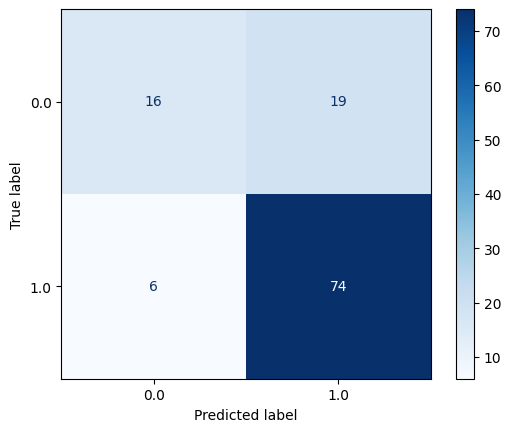

In [25]:
# ada boost
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)
# membuat prediksi
y_pred = model.predict(X_test)
# menghitung akurasi model dengan accuracy, precision, recall, dan confusion matrix
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Sensitivity dan Specificity:', sensitivity_specificity_support(y_test, y_pred, average='binary'))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

Accuracy: 0.808695652173913
Precision: 0.8616666666666667
Recall: 0.6937500000000001
F1 Score: 0.7188888888888889
Confusion Matrix:
 [[14 21]
 [ 1 79]]
Sensitivity dan Specificity: (0.9875, 0.4, None)


<Figure size 800x600 with 0 Axes>

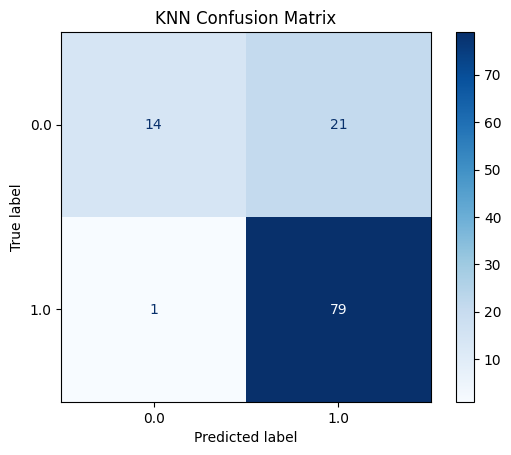

In [27]:
# knn
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN model with appropriate hyperparameters (adjust as needed)
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
# Train the KNN model
knn_model.fit(X_train, y_train)
# Make predictions
y_pred = knn_model.predict(X_test)
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))
print('Confusion Matrix:\n', cm)
print('Sensitivity dan Specificity:', sensitivity_specificity_support(y_test, y_pred, average='binary'))
# Visualize the confusion matrix (optional)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('KNN Confusion Matrix')
plt.show()